# Linear Regression

It is time for the main event: we are going to build our first predictive model!

The simplest model to build is linear regression. Think back to whenever you have plotted a scatter plot and were asked to draw a line of best fit; this is essentially what linear regression does — it finds the line which best describes the data. We can then use the output to either evaluate the impact a predictive feature has had on our target, or even predict what a future value may be!

Let's import our college data and start building a model to predict graduation rates.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
college = pd.read_csv('college_data.csv')
college.head()

,College,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
3,Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
4,Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


In this lesson we are going to build a model which predicts graduation rates given how much the college is spending per learner. Let's take a look at the data:

[]

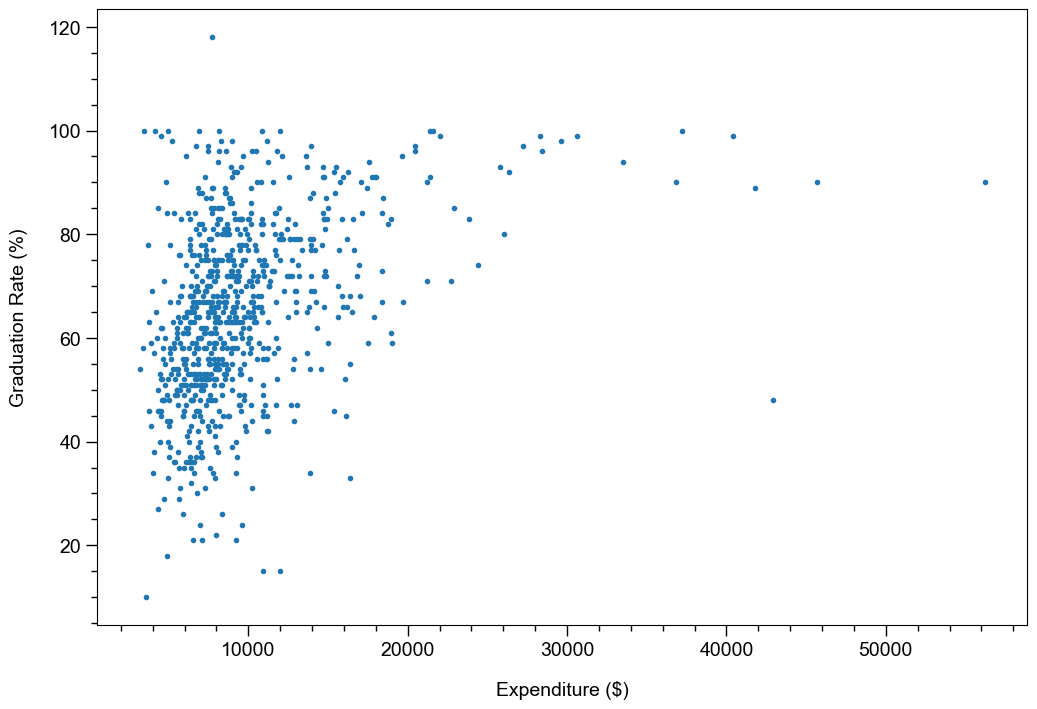

In [3]:
fig, ax = plt.subplots(figsize=(12, 8))
ax.plot(college.Expend, college['Grad.Rate'], '.')
ax.set_xlabel('Expenditure ($)')
ax.set_ylabel('Graduation Rate (%)')
plt.plot()

Did you spot the problem with this data? One of the college's has a graduation rate > 100% which may affect our model, so before we start building we should remove this outlier.

In [4]:
college_clean = college[college['Grad.Rate'] <= 100]

There are several libraries we can use for making models, but the one we will be focussing on is sklearn. An advantage of sklearn is how consistent its syntax is across all possible models in the library. How you code linear regression (the simplest model) is the same as how you would code more sophisticated models (although the EDA process will be different).

The first thing we will need to do is extract our target (what we are predicting) as a <b>series</b> and our predictor(s) as a matrix (dataframe).

For now let's build a model with this one predictor.

In [5]:
# target series
y = college_clean['Grad.Rate']

# predictor matrix
X = college_clean[['Expend']]

# Note the usual naming convention: y for target and X for predictors

Now we import the function from the sklearn library:

In [6]:
from sklearn.linear_model import LinearRegression

Next we create an instance of the model:

In [7]:
lr = LinearRegression()

We now have a 'skeleton' of a model. Python knows that we intend to use linear regression, but it doesn't have any data. We need to now fit the data to the model.

In [8]:
lr.fit(X, y)

LinearRegression()

And that's it! We have built our first model!

But how do we use it?

One thing we can do is look at the outputs. The intercept is what value the model will predict when the predictor is equal to 0.

In [9]:
lr.intercept_

52.93845803578205

According to our model, if a college spends $0 per student, the graduation rate will be roughly 53%. 

We can also look at the predictor's coefficient, which we interpret as the effect it has on what we are predicting:

In [10]:
lr.coef_

array([0.0012892])

According to our model, for every $1 a college spends per student the graduation rate goes up by 0.001%.

### Practice

Load in the Ames housing data you explored in the previous section. Build a linear model that predicts sale price given the year the number of full bathrooms it has. Interpret the coefficient and intercept of the model in the context of the data.

In [11]:
house_df = pd.read_csv('house_clean.csv')
house_df.head()

,SalePrice,LotFrontage,LotArea,YearBuilt,FullBath,HalfBath,BedroomAbvGr,GarageCars,GarageArea,Neighborhood_Blueste,...,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker
0,208500,65.0,8450,2003,2,1,3,2,548,0,...,0,0,0,0,0,0,0,0,0,0
1,181500,80.0,9600,1976,2,0,3,2,460,0,...,0,0,0,0,0,0,0,0,0,1
2,223500,68.0,11250,2001,2,1,3,2,608,0,...,0,0,0,0,0,0,0,0,0,0
3,140000,60.0,9550,1915,1,0,3,3,642,0,...,0,0,0,0,0,0,0,0,0,0
4,250000,84.0,14260,2000,2,1,4,3,836,0,...,1,0,0,0,0,0,0,0,0,0


In [12]:
# Build a linear model that predicts sale price given the year built

# target series
y = house_df['SalePrice']
# predictor matrix
X = house_df[['YearBuilt']]
lr = LinearRegression()
lr.fit(X, y)
print(lr.intercept_)

-2571861.809403368


In [13]:
print('This model predicts that a house built in year 0 (!) will sell for the value of ${:,.2f}'.format(
    lr.intercept_))
print('This model predicts that each year adds ${:,.2f} to the sale price'.format(
    lr.coef_[0]))

This model predicts that a house built in year 0 (!) will sell for the value of $-2,571,861.81
This model predicts that each year adds $1,396.45 to the sale price


In [14]:
# Build a linear model that predicts sale price given the number of bathrooms
# target series
y = house_df['SalePrice']
# predictor matrix
X = house_df[['FullBath']]
lr = LinearRegression()
lr.fit(X, y)
print(lr.intercept_)
print(lr.coef_)

51171.17703384718
[82269.09120248]


In [15]:
print('This model predicts that a house with no bathrooms will sell for the value of ${:,.2f}'.format(
    lr.intercept_))
print('This model predicts that each bathroom adds ${:,.2f} to the sale price'.format(
    lr.coef_[0]))

This model predicts that a house with no bathrooms will sell for the value of $51,171.18
This model predicts that each bathroom adds $82,269.09 to the sale price


## Multiple features

In the previous example we only used one predictor, but there is actually no limit to how many we can use. Let's build another model that will predict graduation rate when given a college's expenditure per student and what percentage of students they had that were in the top 10% of their class.

In [16]:
# New predictor matrix (we'll use the same target series as before)
y = college_clean['Grad.Rate']
X2 = college_clean[['Top10perc', 'Expend']]

In [17]:
lr2 = LinearRegression()
lr2.fit(X2, y)

LinearRegression()

It is that easy to build a model, you just add as many predictors as you would like to the matrix. Let's see what happens with the outputs this time:

In [18]:
lr2.intercept_

# Q: What do you think this value means?

50.43277185490851

In [19]:
# A: If a college spends $0 per student and has no students in the top 10% of their class, the graduation rate (according to the model) will be 50.4%.

In [20]:
lr2.coef_

# What do you think these values mean?

array([4.16152038e-01, 3.60597293e-04])

The order of the printed values is the same as the order defined in the predictor matrix. 
- So, in this case, for every 1% increase in the percentage of students in the top 10% of their high school class, the graduation rate will increase by 0.4%. 
- For every $1 a college spends on a student, the graduation rate (according to our model) will increase by 0.00036%.</p>

To help interpret coefficients (especially if trying to evaluate which is the most influential) it is a good idea to build a dataframe which matches the coefficient to the target and then sort it by effect size. This is particularly useful if you are using a lot of features.

In [21]:
coef_df = pd.DataFrame(
    {'Features': X2.columns, 'Effect Size on Graduation Rate (%)': lr2.coef_}).set_index('Features')
coef_df

,Effect Size on Graduation Rate (%)
Features,
Top10perc,0.416152
Expend,0.000361


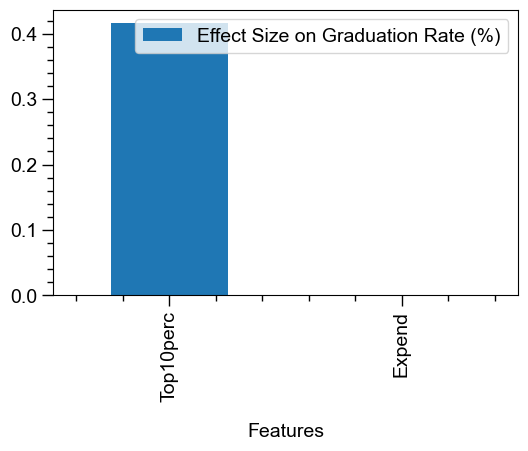

In [22]:
coef_df.plot(kind='bar');

This allows us to clearly see that Top10perc is a much more influential feature than how much a college is spending per student on graduation rates, according to this model. But how reliable is this?

### Practice

Build a second model using the Ames housing dataset that predicts sale price given number of full bathrooms, number of bedrooms and size of the garage. Which feature is the most influential in predicting sale price according to your model?

In [23]:
house_df.columns

Index(['SalePrice', 'LotFrontage', 'LotArea', 'YearBuilt', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'GarageCars', 'GarageArea',
       'Neighborhood_Blueste', 'Neighborhood_BrDale', 'Neighborhood_BrkSide',
       'Neighborhood_ClearCr', 'Neighborhood_CollgCr', 'Neighborhood_Crawfor',
       'Neighborhood_Edwards', 'Neighborhood_Gilbert', 'Neighborhood_IDOTRR',
       'Neighborhood_MeadowV', 'Neighborhood_Mitchel', 'Neighborhood_NAmes',
       'Neighborhood_NPkVill', 'Neighborhood_NWAmes', 'Neighborhood_NoRidge',
       'Neighborhood_NridgHt', 'Neighborhood_OldTown', 'Neighborhood_SWISU',
       'Neighborhood_Sawyer', 'Neighborhood_SawyerW', 'Neighborhood_Somerst',
       'Neighborhood_StoneBr', 'Neighborhood_Timber', 'Neighborhood_Veenker'],
      dtype='object')

In [24]:
# Build a linear model that predicts sale price given the year built and given the number of full bathrooms, number of bedrooms and size of the garage.
# target series
y = house_df['SalePrice']
# predictor matrix
# GarageCars: Size of garage in car capacity, GarageArea: Size of garage in square feet
X = house_df[['FullBath', 'BedroomAbvGr', 'GarageCars']]
lr = LinearRegression()
lr.fit(X, y)
print(lr.intercept_)
print(lr.coef_)

14079.568267316849
[48028.05114065  -289.06213782 51915.85096476]


In [25]:
coef_df = pd.DataFrame({'Features': X.columns, 'Effect Size on Sale Price ($)': lr.coef_}).set_index(
    'Features').sort_values('Effect Size on Sale Price ($)')
coef_df

,Effect Size on Sale Price ($)
Features,
BedroomAbvGr,-289.062138
FullBath,48028.051141
GarageCars,51915.850965


## Making a prediction

Evaluating the effect a feature has on a prediction is a useful application of a linear model, but what about using it to make a prediction? If we already know the value of the intercept (i.e the value that target feature takes if all predictors are 0) and the coefficients (effect each predictor has on the target) we can then make predictions.

You may remember from when you were at school that the equation for a straight line is

$y$ = $mx$ + $c$

where m is the gradient and c is the intercept. With linear regression then, c is still the intercept while m is the value of the coefficient. We then write the formula as:

$\hat{y}$ = $\beta_0$ + $\beta_1 x_1$ 

Where $\beta_0$ is the intercept and $\beta_1$ is the value of the coefficient for the predictor $x_1$.   
$\hat{y}$ is the prediction.

So in our example if would be:

Predicted graduation rate  = $\beta_0$ + $\beta_1$ * Expenditure per student  

For example, for a college that spends $22,239 per student, we can use our model to make the following prediction:

In [26]:
# Build a linear model that predicts graduation rate given the expenditure per student
# target series
y = college_clean['Grad.Rate']
# predictor matrix
X = college_clean[['Expend']]
lr = LinearRegression()
lr.fit(X, y)
# print(lr.intercept_)

LinearRegression()

In [27]:
lr.intercept_ + 22239 * lr.coef_[0]

81.60899145475051

What if we also knew that 13% of their learners came from the top 10% of their high school class?

We just expand the formula:

$\hat{y}$ = $\beta_0$ + $\beta_1 x_1$ + $\beta_2 x_2$ + ...

So our formula would be:

Predicted graduation rate = $\beta_0$ +  ($\beta_1$ $\times$ (% in top 10% of high school class))  + ($\beta_2$ $\times$ (expenditure per student))


In [28]:
# Build a linear model that predicts sale price given the year built
# target series
y = college_clean['Grad.Rate']
# predictor matrix
X = college_clean[['Top10perc', 'Expend']]
lr2 = LinearRegression()
lr2.fit(X, y)
# print(lr.intercept_)

LinearRegression()

In [29]:
lr2.intercept_ + (13 * lr2.coef_[0]) + (22239 * lr2.coef_[1])

63.862071545032954

Notice that the order of coefficients matched the order of the features in the original predictor matrix. This however is a tedious way of performing this prediction, it would be simpler to use the inbuilt `.predict()` function instead.

In [30]:
# model 1

print('Predicted graduation rate (%): '+str(lr.predict([[22239]])))

# model 2

print('Predicted graduation rate (%): '+str(lr2.predict([[13, 22239]])))

Predicted graduation rate (%): [81.60899145]
Predicted graduation rate (%): [63.86207155]


c:\Users\renju\anaconda3\envs\data\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
c:\Users\renju\anaconda3\envs\data\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [31]:
# This is the right way to suppress warnings (because it only suppresses the warnings you want to suppress):
import warnings

with warnings.catch_warnings():
    # Notice how we have specified the type of warning we want to suppress (UserWarning)
    warnings.simplefilter("ignore", UserWarning)

    print('Predicted graduation rate (%): '+str(lr.predict([[22239]])))
    print('Predicted graduation rate (%): '+str(lr2.predict([[13, 22239]])))

Predicted graduation rate (%): [81.60899145]
Predicted graduation rate (%): [63.86207155]


In [32]:
# A worse way is to suppress all UserWarning warnings from sklearn:

#with warnings.catch_warnings():
#    warnings.simplefilter("ignore", UserWarning)
#    import sklearn

# An even worse way to do it is to suppress all UserWarning warnings from all packages:
# import warnings 
# warnings.filterwarnings("ignore", UserWarning)

Notice in both cases that what was passed into the function was a dataframe (like the original predictor matrix) and that the order of features was the same as well. This function works for any number of new data you want to predict; just add it to the matrix! 

For example, if I wanted to predict the graduation rates of four colleges we can use the following code:

In [33]:
new_vals = [[2032], [2434], [9383], [12922]]
lr.predict(new_vals)

# I will show a better commented version in the Practice section

c:\Users\renju\anaconda3\envs\data\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([55.55811377, 56.07637244, 65.0350278 , 69.59750893])

### Practice

A house comes to market with 3 full bathrooms, 4 bedrooms and a garage that can fit one car. Using both models predict what the saleprice will be.

In [34]:
# Build a linear model that predicts sale price given the year built and given the number of bathrooms
# target series
y_h = house_df['SalePrice']
# predictor matrix
# GarageCars: Size of garage in car capacity, GarageArea: Size of garage in square feet
X_h = house_df[['FullBath']]
lr3 = LinearRegression()
lr3.fit(X_h, y_h)
print(lr3.intercept_)
print(lr3.coef_)

51171.17703384718
[82269.09120248]


In [35]:
# Build a linear model that predicts sale price given the year built and given the number of bathrooms
# target series
y_h = house_df['SalePrice']
# predictor matrix
# GarageCars: Size of garage in car capacity
X_h = house_df[['FullBath', 'BedroomAbvGr', 'GarageCars']]
lr4 = LinearRegression()
lr4.fit(X_h, y_h)
print(lr4.intercept_)
print(lr4.coef_)

14079.568267316849
[48028.05114065  -289.06213782 51915.85096476]


In [36]:
predicted_sales_price = lr3.predict([[3]])[0]
print('Predicted sale price: ${:,.2f}'.format(predicted_sales_price))

c:\Users\renju\anaconda3\envs\data\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


Predicted sale price: $297,978.45


In [37]:
predicted_sales_price = lr4.predict([[3, 4, 1]])[0]
print('Predicted sale price: ${:,.2f}'.format(predicted_sales_price))

Predicted sale price: $208,923.32


c:\Users\renju\anaconda3\envs\data\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [38]:
# Here is the correct way to address this warning:

# First we make a DataFrame with the predictor variables we want to use
make_predictions_dict = {'FullBath': 3, 'BedroomAbvGr': 4, 'GarageCars': 1}
make_predictions_df = pd.DataFrame(make_predictions_dict, index=[0])

# We then use the predict method
predicted_sales_price = lr4.predict(make_predictions_df)[0]
print('Predicted sale price: ${:,.2f}'.format(predicted_sales_price))

Predicted sale price: $208,923.32


## Evaluating a model

A linear regression model works by trying to find a pattern between the predictors and the target feature. However, there is going to be some difference between the model and the observed values; the formula for linear regression is actually:

$\hat{y}$ = $\beta_0$ + $\beta_1 x_1$ + $\beta_2 x_2$ + ... +  $\epsilon$  

where $\epsilon$ is the error, or residuals. We want our model to minimise this value and to assess this we need some evaluation metrics.


### Compare predictions vs actual values

The simplest method would be to compare what the model predicts vs actual values. We can do this by running our predictor matrix through the model and receiving a set of predictions, we can then compare these to our target series to see how accurate they were:

In [39]:
# target series
y = college_clean['Grad.Rate']
# predictor matrix
X = college_clean[['Expend']]
# Build a linear model that predicts Graduation Rate given the Expenditure
lr = LinearRegression()
lr.fit(X, y)

LinearRegression()

In [40]:
actuals = college_clean['Grad.Rate']  # this is the same as our target series
preds = lr.predict(X)  # predicted values

In [41]:
compare_df = pd.DataFrame({'Predicted Grad Rate': preds,
                          'Actual Grad Rate': actuals}).set_index(college_clean.College)
compare_df

,Predicted Grad Rate,Actual Grad Rate
College,,
Abilene Christian University,62.015720,60
Adelphi University,66.509873,56
Adrian College,64.199626,54
Agnes Scott College,77.453898,59
Alaska Pacific University,67.019108,15
...,...,...
Worcester State College,58.699896,40
Xavier University,64.784923,83
Xavier University of Louisiana,63.668475,49


If the model was truly accurate then you would expect the predicted and actual values to be close. If we then plot these values against each other we should see a diagonal line.

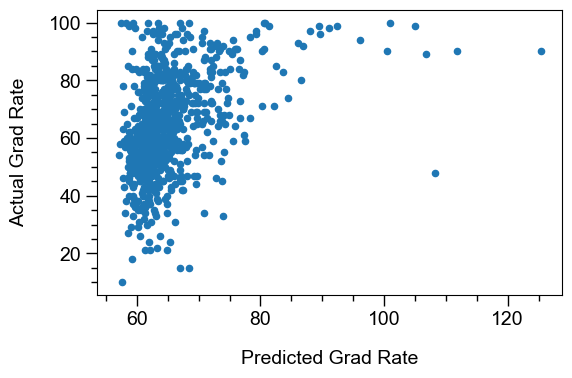

In [42]:
compare_df.plot(x='Predicted Grad Rate', y='Actual Grad Rate', kind='scatter');

This clearly isn't the case, which indicates that our model has made some mistakes- but how bad? This is where we bring in some metrics.

The difference between a predicted value and actual value is called a residual and we want these to be minimised. Model building is an iterative process where we try different combinations of features and see which is best. We therefore need metrics for comparision.

### RMSE

In module 8 we met the root mean squared error, which tells us on average how far our predictions are off. We will use the same syntax as before: 

In [43]:
from sklearn.metrics import mean_squared_error
import numpy as np

rmse=np.sqrt(mean_squared_error(preds,actuals))
print(rmse)

15.690825015099598


This means that our first model was off by an average of 15.7%, which given that the actual values range between 10 and 100 is a significant error. 

In [44]:
# target series
y = college_clean['Grad.Rate']
# predictor matrix
X = college_clean[['Top10perc', 'Expend']]
# Build a linear model
lr2 = LinearRegression()
lr2.fit(X, y)

LinearRegression()

In [45]:
# Calculate and interpret the RMSE for model 2

actuals2 = college_clean['Grad.Rate']  # this is the same as our target series
preds2 = lr2.predict(X)  # predicted values

rmse2 = np.sqrt(mean_squared_error(preds2, actuals2))
print(rmse2)

14.693387539320973


The RMSE of predicted graduation rates is 14.7%

14.7% < 15.7%, so our second model is better

### MAE

We also met the mean absolute error last module for evaluating how far our predictions are off.

In [46]:
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(preds, actuals)
print(mae)

12.386463474868219


This gives a <i>slightly</i> better picture that our model is off on average by 12.4%.

In [47]:
# Calculate and interpret the MAE for model 2

mae2 = mean_absolute_error(preds2, actuals2)
print(mae2)

11.573450351437222


On average graduation rates have a MAE of 11.6% 

### r-squared

Both MAE and RMSE look at the difference between actual values and predictions; however, there is a different kind of test: r-squared. Essentially, this metric works by comparing your model to just guessing. 

More formally, it is a goodness-of-fit test that explains how much of the variance in what you are predicting comes from your model. Whenever we build a predictive model we expect the target to be somewhat varied (e.g. a set of exam results ranging from 0 to 100) and we want to identify what factors lead to those results. For example, what led student A to get 87% but caused student B to get 34%? 

R-squared then is the metric that shows how much of the target variable's behaviour can be explained by the model that has been built, and it works by comparing your model's predictions to just guessing (i.e. using the mean as a prediction).

The visualisation below shows the spread of our data from earlier with the red line showing the mean as a predictor, and the purple line showing our model as a predictor. Which seems to explain the data better?

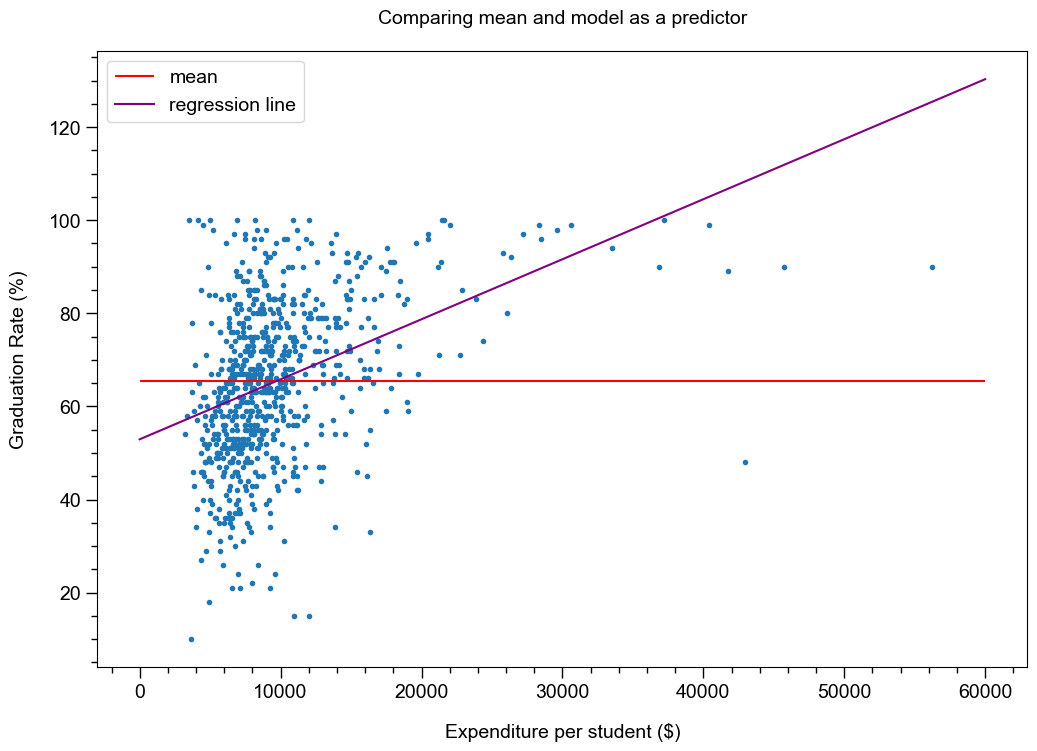

In [48]:
fig, ax = plt.subplots(figsize=(12, 8))

ax.plot(college_clean.Expend, college_clean['Grad.Rate'], '.')
ax.hlines(college_clean['Grad.Rate'].mean(), xmin=0,
          xmax=60000, color='r', label='mean')
X_plot = np.linspace(0, 60000, 200)
ax.plot(X_plot, X_plot*lr.coef_[0]+lr.intercept_,
        color='purple', label='regression line')
ax.legend()
ax.set_title('Comparing mean and model as a predictor')
ax.set_xlabel('Expenditure per student ($)')
ax.set_ylabel('Graduation Rate (%)')
plt.show()

r-squared works by comparing the total squared error of using your model (<b>RSS</b> - <i>residual sum of squares</i>) against the total squared error of using the mean (<b>TSS</b>- <i>total sum of squares</i>):

$R^2$= 1 -$\frac{RSS}{TSS}$

In other words, it finds the ratio between the error from using the mean and using your model and subtracts it from 1. If our model perfectly explains the variance in the target it will return 1. If it is only as good as guessing it will return 0. If it is worse than guessing, the score will be negative.

Thankfully, to save us from having to do this manually sklearn has an inbuilt function that will do this for us called `.score()`. To use this function you need to pass in your predictor matrix and target series:

In [49]:
# target series
y = college_clean['Grad.Rate']
# predictor matrix
X = college_clean[['Expend']]
lr.score(X, y)

0.15543190004469465

But is this score any good?

It depends on the context. In this situation we would read this as: 15.5% of the variance in graduation rates can be explained by using expenditure per student as a predictor. That means 84.5% of the differences between graduation rates are unexplained by this model. 

This means that this model is not particularly good for predicting future graduation rates, but does give us some context for our college expenditure: it explains 15.5% of the difference in graduation rates between colleges. 

In real world scenarios there can be hundreds of factors that can explain a result, many of which won't have been captured in the data, so a score of 0.155 may not be that bad. However, if it is a controlled experiment where there is only one or two factors that can explain the result, and you get a score of 0.155 that would be pretty terrible. 

On top of this, you should be skeptical about any model with high r-squared scores. It probably means your model is over-fitting (~~explaining the data too well~~) and won't work with new data.

Overfitting occurs when the model corresponds too closely to the particular dataset that it is trained on, and so it does not perform accurately against the testing data.

In [50]:
# Calculate and interpret the r-squared for the second model, does it perform better or worse than the first?

# target series
y = college_clean['Grad.Rate']
# predictor matrix
X = college_clean[['Top10perc', 'Expend']]
lr2.score(X, y)

0.25939441631998184

0.26 > 0.16, so it performs better

### Practice

Calculate RMSE, MAE and r-squared for *both* models you built for predicting house sale price, which one performs best?

In [51]:
# Build a linear model that predicts sale price given the year built and given the number of bathrooms
# target series
y_h3 = house_df['SalePrice']
# predictor matrix
X_h3 = house_df[['FullBath']]
lr3 = LinearRegression()
lr3.fit(X_h3, y_h3)
print(lr3.intercept_)
print(lr3.coef_)

51171.17703384718
[82269.09120248]


In [52]:
# Build a linear model that predicts sale price given the year built and given the number of bathrooms
# target series
y_h4 = house_df['SalePrice']
# predictor matrix
# GarageCars: Size of garage in car capacity, GarageArea: Size of garage in square feet
X_h4 = house_df[['FullBath', 'BedroomAbvGr', 'GarageCars']]
lr4 = LinearRegression()
lr4.fit(X_h4, y_h4)
print(lr4.intercept_)
print(lr4.coef_)

14079.568267316849
[48028.05114065  -289.06213782 51915.85096476]


In [53]:
actuals3 = house_df['SalePrice']  # this is the same as our target series
preds3 = lr3.predict(X_h3)  # predicted values
rmse3 = np.sqrt(mean_squared_error(preds3, actuals3))
print(rmse3)
mae3 = mean_absolute_error(preds3, actuals3)
print(mae3)
print(lr3.score(X_h3, y_h3))

66215.56856440038
45824.69643733366
0.3172116180623076


In [54]:
actuals4 = house_df['SalePrice']  # this is the same as our target series
preds4 = lr4.predict(X_h4)  # predicted values
rmse4 = np.sqrt(mean_squared_error(preds4, actuals4))
print(rmse4)
mae4 = mean_absolute_error(preds4, actuals4)
print(mae4)
print(lr4.score(X_h4, y_h4))

55784.83475600896
39706.20391764409
0.5153834967287055


In [55]:
# Print rmse3 with f-string to include $
print(f'RMSE for model 3: ${rmse3:,.2f}')
print(f'RMSE for model 4: ${rmse4:,.2f}')
print(f'MAE for model 3: ${mae3:,.2f}')
print(f'MAE for model 4: ${mae4:,.2f}')

print(f'r-squared for model 3: {lr3.score(X_h3,y_h3):,.2f}')
print(f'r-squared for model 4: {lr4.score(X_h4,y_h4):,.2f}')

RMSE for model 3: $66,215.57
RMSE for model 4: $55,784.83
MAE for model 3: $45,824.70
MAE for model 4: $39,706.20
r-squared for model 3: 0.32
r-squared for model 4: 0.52


## Validating our model

So far we have built our models using all of our available data, but this creates an issue: how do we know if the model will perform just as well on new data?

Not knowing this means we could have an issue with overfitting (where our model fits too closely to our data, but not anything new) or underfitting (where our model doesn't fit well at all). 

To know this, we need new data to test our model on, but where is it going to come from?

We take it from our data. Before we build our model we remove a testing set (usually 20%) and put it to the side. We then build the model with the remaining 80% (training set) and see how it performs. We then <b>test</b> it with the other 20% and compare the results. As the model has not yet seen the test data we can observe how it reacts to something new, and then compare the results.

If our model performs much worse on the new data, we know that it has overfit. If it performs roughly the same, then our model is fitting appropriately.

Let's see how we perform this process:

In [56]:
# import train_test_split- a function that will divide up our data

from sklearn.model_selection import train_test_split

`train_test_split` takes two inputs - a predictor matrix and target series. We will also need to define how big the test set should be (usually 20%). The function then has four outputs - a predictor matrix and target series for training, and a predictor matrix and target series for testing.

In [57]:
X = college_clean[['Expend']]

In [58]:
y = college_clean['Grad.Rate']

In [59]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, train_size=0.8, random_state=100)

You may have noticed the argument `random_state`. This has been included to ensure that the train_test_split picks the same data in each set each time the code is run. You don't always need to do this, but it has been included so everyone using these notebooks get the same output when running the code.

In [60]:
# build model with training data

lr3 = LinearRegression()
lr3.fit(X_train, y_train)

LinearRegression()

In [61]:
# Compare r-squared scores

print(f'Training score: {lr3.score(X_train,y_train):,.3f}')
print(f'Testing score: {lr3.score(X_test,y_test):,.3f}')

Training score: 0.152
Testing score: 0.150


As both scores are similar we can say that our model is neither over or under fitting.

## Practice

Use the train_test_split function to create a training and testing set for your first housing model. Rebuild the model with your training data and test it with the testing data. Does it fit the data well?

In [62]:
X_h10 = house_df[['FullBath']]
y_h10 = house_df['SalePrice']

In [63]:
X_trainh10, X_testh10, y_trainh10, y_testh10 = train_test_split(
    X_h10, y_h10, train_size=0.8, random_state=888)
lr10 = LinearRegression()
lr10.fit(X_trainh10, y_trainh10)

print(f'Training score: {lr10.score(X_trainh10,y_trainh10):,.3f}')
print(f'Testing score: {lr10.score(X_testh10,y_testh10):,.3f}')

Training score: 0.307
Testing score: 0.355


In [64]:
actuals10 = house_df['SalePrice']  # this is the same as our target series
preds10 = lr10.predict(X_h10)  # predicted values
rmse10 = np.sqrt(mean_squared_error(preds10, actuals10))
mae10 = mean_absolute_error(preds10, actuals10)

# Print rmse10 with f-string to include $
print(f'RMSE for model 10: ${rmse10:,.2f}')
print(f'MAE for model 10: ${mae10:,.2f}')
print(f'r-squared for model 10: {lr10.score(X_h10,y_h10):,.2f}')

RMSE for model 10: $66,224.76
MAE for model 10: $45,943.75
r-squared for model 10: 0.32


In [65]:
lr10 = LinearRegression()
lr10.fit(X_h10, y_h10)

actuals10 = house_df['SalePrice']  # this is the same as our target series
preds10 = lr10.predict(X_h10)  # predicted values
rmse10 = np.sqrt(mean_squared_error(preds10, actuals10))
mae10 = mean_absolute_error(preds10, actuals10)

# Print rmse10 with f-string to include $
print(f'RMSE for model 10: ${rmse10:,.2f}')
print(f'MAE for model 10: ${mae10:,.2f}')
print(f'r-squared for model 10: {lr10.score(X_h10,y_h10):,.2f}')

RMSE for model 10: $66,215.57
MAE for model 10: $45,824.70
r-squared for model 10: 0.32


In [66]:
preds_train_10 = lr10.predict(X_trainh10)  # predicted values
rmse_train_10 = np.sqrt(mean_squared_error(preds_train_10, y_trainh10))
mae_train_10 = mean_absolute_error(preds_train_10, y_trainh10)

preds_test_10 = lr10.predict(X_testh10)  # predicted values
rmse_test_10 = np.sqrt(mean_squared_error(preds_test_10, y_testh10))
mae_test_10 = mean_absolute_error(preds_test_10, y_testh10)

# Print with f-string
print(f'Training RMSE: ${rmse_train_10:,.2f}')
print(f'Testing RMSE: ${rmse_test_10:,.2f}')
print()
print(f'Training MAE: ${mae_train_10:,.2f}')
print(f'Testing MAE: ${mae_test_10:,.2f}')

Training RMSE: $66,397.45
Testing RMSE: $65,484.51

Training MAE: $46,187.69
Testing MAE: $44,375.77


In [67]:
# Note that these must necessarily equal 1.0
print(lr10.score(X_trainh10,preds_train_10))
print(lr10.score(X_testh10,preds_test_10))

1.0
1.0


## Practice

Build a third model that predicts house prices in Ames using any combination of features you would like (hint: check your results from your exploratory data analysis). Use train_test_split to create a training set to build the model and a testing set to evaluate it. Use RMSE, MAE and r-squared to evaluate your model- does it perform better than the other tewo you built?

In [68]:
X_h10 = house_df[['FullBath']]
y_h10 = house_df['SalePrice']
X_trainh10, X_testh10, y_trainh10, y_testh10 = train_test_split(
    X_h10, y_h10, train_size=0.8, random_state=888)
lr10 = LinearRegression()
lr10.fit(X_trainh10, y_trainh10)

print(f'Training score: {lr10.score(X_trainh10,y_trainh10):,.3f}')
print(f'Testing score: {lr10.score(X_testh10,y_testh10):,.3f}')

Training score: 0.307
Testing score: 0.355


In [69]:
X_h11 = house_df[['FullBath', 'GarageCars']]
y_h11 = house_df['SalePrice']
X_trainh11, X_testh11, y_trainh11, y_testh11 = train_test_split(X_h11,y_h11, train_size=0.8,random_state=888)
lr11=LinearRegression()
lr11.fit(X_trainh11,y_trainh11)

print(f'Training score: {lr11.score(X_trainh11,y_trainh11):,.3f}')
print(f'Testing score: {lr11.score(X_testh11,y_testh11):,.3f}')

Training score: 0.521
Testing score: 0.493


In [70]:
X_h12 = house_df[['FullBath', 'GarageCars', 'YearBuilt']]
y_h12 = house_df['SalePrice']
X_trainh12, X_testh12, y_trainh12, y_testh12 = train_test_split(X_h12,y_h12, train_size=0.8,random_state=888)
lr12=LinearRegression()
lr12.fit(X_trainh12,y_trainh12)

print(f'Training score: {lr12.score(X_trainh12,y_trainh12):,.3f}')
print(f'Testing score: {lr12.score(X_testh12,y_testh12):,.3f}')

Training score: 0.547
Testing score: 0.504


In [71]:
preds_test_10 = lr10.predict(X_testh10)  # predicted values
rmse_test_10 = np.sqrt(mean_squared_error(preds_test_10, y_testh10))
mae_test_10 = mean_absolute_error(preds_test_10, y_testh10)

# Print with f-string
print(f'Testing RMSE: ${rmse_test_10:,.2f}')
print(f'Testing MAE: ${mae_test_10:,.2f}')

preds_test_11 = lr11.predict(X_testh11)  # predicted values
rmse_test_11 = np.sqrt(mean_squared_error(preds_test_11, y_testh11))
mae_test_11 = mean_absolute_error(preds_test_11, y_testh11)

# Print with f-string
print(f'Testing RMSE: ${rmse_test_11:,.2f}')
print(f'Testing MAE: ${mae_test_11:,.2f}')

preds_test_12 = lr12.predict(X_testh12)  # predicted values
rmse_test_12 = np.sqrt(mean_squared_error(preds_test_12, y_testh12))
mae_test_12 = mean_absolute_error(preds_test_12, y_testh12)

# Print with f-string
print(f'Testing RMSE: ${rmse_test_12:,.2f}')
print(f'Testing MAE: ${mae_test_12:,.2f}')

Testing RMSE: $65,568.22
Testing MAE: $44,454.32
Testing RMSE: $58,100.33
Testing MAE: $41,223.40
Testing RMSE: $57,465.45
Testing MAE: $41,152.67


# Appendix

In [72]:
# Appendix

# The other way to address the UserWarning error is to not train with Feature labels.

# Build a linear model that predicts sale price given the year built and given the number of bathrooms
# target series
y_h = house_df['SalePrice']
# predictor matrix
# This removes the column name and converts the series to a numpy array
X_h = house_df['FullBath'].to_numpy().reshape(-1, 1)
lr3 = LinearRegression()
lr3.fit(X_h, y_h)
print(lr3.intercept_)
print(lr3.coef_)

51171.17703384718
[82269.09120248]
